In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
from numpy import newaxis
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import  GRU,LSTM
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, SpatialDropout1D, Embedding,Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import string
import tensorflow as tf
import re

Using TensorFlow backend.


In [2]:
#importing the sentences
with open('doccuments.txt', 'r') as f:
 reviews = f.read()

In [3]:
#lowercased the sentences
reviews = reviews.lower()

In [4]:
#removing the punctuations
from string import punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:

for c in string.punctuation:
 reviews= reviews.replace(c,"")

print(reviews)

its important to realise how disgusting the people around you are
layin n bed with a headache  ughhhh waitin on your call
funeral ceremony gloomy friday
i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me 2 scandalous
charlene my love i miss you
im sorry  at least its friday
ugh i have to beat this stupid song to get to the next  rude
if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol
the storm is here and the electricity is gone
so sleepy again and its not even that late i fail once again
how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend
im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd
fudge just bsd that whole paper so tired ugh i hate school  time to sleep
im having a problem with my photo here in twitter amfcant see my face
so

In [6]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
reviews = remove_pattern(reviews, "@[\w]*")

In [7]:
#splitting the sentences
reviews_split = reviews.split("\n")

In [8]:
def removeDigits(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews_split)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me  scandalous', 'charlene my love i miss you', 'im sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'im having a problem with my phot

In [9]:
def removeDigits(list): 
    pattern = 'im '
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but not thinking about an old friend who i want but hes married now damn amp he wants me  scandalous', 'charlene my love i miss you', 'sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'having a problem with my photo here in tw

In [10]:
def removeDigits(list): 
    pattern = 'i '
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews)

In [11]:
def removeDigits(list): 
    pattern = ' u '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if watch the hills in london will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amfcant see my face'

In [12]:
def removeDigits(list): 
    pattern = ' cant '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if watch the hills in london will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amfcant see my face'

In [13]:
def removeDigits(list): 
    pattern = 'cant '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)

In [14]:
#importing the categories
with open('categories.txt', 'r') as f:
 labels = f.read()

In [15]:
labels = labels.lower()

In [16]:
labels_split = labels.split("\n")

In [17]:
#tokenizing the categories
import nltk
from nltk import word_tokenize
#nltk.download('punkt')
tokens = [word_tokenize(sen) for sen in reviews]
print(tokens)

[['its', 'important', 'to', 'realise', 'how', 'disgusting', 'the', 'people', 'around', 'you', 'are'], ['layin', 'n', 'bed', 'with', 'a', 'headache', 'ughhhh', 'waitin', 'on', 'your', 'call'], ['funeral', 'ceremony', 'gloomy', 'friday'], ['should', 'be', 'sleep', 'but', 'not', 'thinking', 'about', 'an', 'old', 'friend', 'who', 'want', 'but', 'hes', 'married', 'now', 'damn', 'amp', 'he', 'wants', 'me', 'scandalous'], ['charlene', 'my', 'love', 'miss', 'you'], ['sorry', 'at', 'least', 'its', 'friday'], ['ugh', 'have', 'to', 'beat', 'this', 'stupid', 'song', 'to', 'get', 'to', 'the', 'next', 'rude'], ['if', 'watch', 'the', 'hills', 'in', 'london', 'will', 'realise', 'what', 'tourture', 'it', 'is', 'because', 'were', 'weeks', 'and', 'weeks', 'late', 'just', 'watch', 'it', 'online', 'lol'], ['the', 'storm', 'is', 'here', 'and', 'the', 'electricity', 'is', 'gone'], ['so', 'sleepy', 'again', 'and', 'its', 'not', 'even', 'that', 'late', 'fail', 'once', 'again'], ['how', 'are', 'you', 'convinced

In [18]:
#creating a dataframe
data = pd.DataFrame({'sentiment': labels_split,
                          'text': reviews})



In [19]:
data = data[['sentiment','text']]
data.head()

,sentiment,text
0,disgusting,its important to realise how disgusting the pe...
1,sad,layin n bed with a headache ughhhh waitin on ...
2,sad,funeral ceremony gloomy friday
3,sad,should be sleep but not thinking about an old ...
4,sad,charlene my love miss you


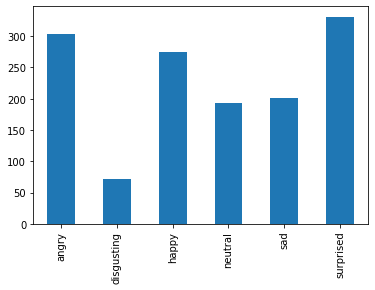

In [20]:
data['sentiment'].value_counts().sort_index().plot.bar()

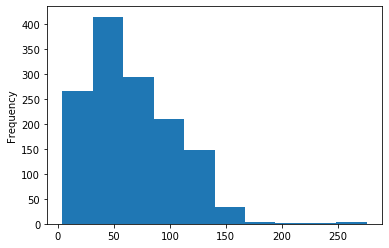

In [21]:
data['text'].str.len().plot.hist()

In [22]:
#paddint our text so they have sama length
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) 
print(len(X[5]))
X[:5]

54


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   20,
         814,    1,  815,   43,  816,    2,   73,  293,    9,   25],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1318,
         294,  168,   27,    3,  264, 1319, 1320,   17,   41,  401],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0

In [23]:
#GRU MODEL
model = Sequential()
model.add(Embedding(4000, 32,input_length=54))
model.add(GRU(100))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 54, 32)            128000    
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 168,506
Trainable params: 168,506
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
y = pd.get_dummies(data['sentiment']).values
[print(data['sentiment'][i], y[i]) for i in range(0,20)]
things = ['angry','disgust','happy','neutral','sad','surprised']

disgusting [0 1 0 0 0 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]
sad [0 0 0 0 1 0]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
len(X_train[20])

54

In [26]:
batch_size = 34
epochs = 200
hist = model.fit(X_train,  y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=2)



Train on 1112 samples, validate on 124 samples
Epoch 1/200
 - 10s - loss: 0.5772 - acc: 0.8131 - val_loss: 0.4519 - val_acc: 0.8333
Epoch 2/200
 - 4s - loss: 0.4368 - acc: 0.8333 - val_loss: 0.4347 - val_acc: 0.8333
Epoch 3/200
 - 4s - loss: 0.4312 - acc: 0.8333 - val_loss: 0.4340 - val_acc: 0.8333
Epoch 4/200
 - 4s - loss: 0.4258 - acc: 0.8333 - val_loss: 0.4326 - val_acc: 0.8333
Epoch 5/200
 - 4s - loss: 0.4134 - acc: 0.8333 - val_loss: 0.4314 - val_acc: 0.8333
Epoch 6/200
 - 4s - loss: 0.3867 - acc: 0.8333 - val_loss: 0.4307 - val_acc: 0.8333
Epoch 7/200
 - 4s - loss: 0.3324 - acc: 0.8492 - val_loss: 0.4261 - val_acc: 0.8293
Epoch 8/200
 - 4s - loss: 0.2510 - acc: 0.9038 - val_loss: 0.4402 - val_acc: 0.8212
Epoch 9/200
 - 4s - loss: 0.1814 - acc: 0.9366 - val_loss: 0.4506 - val_acc: 0.8280
Epoch 10/200
 - 4s - loss: 0.1316 - acc: 0.9592 - val_loss: 0.4850 - val_acc: 0.8293
Epoch 11/200
 - 4s - loss: 0.0939 - acc: 0.9760 - val_loss: 0.5165 - val_acc: 0.8306
Epoch 12/200
 - 4s - loss

Epoch 95/200
 - 4s - loss: 0.0014 - acc: 0.9997 - val_loss: 1.0737 - val_acc: 0.8011
Epoch 96/200
 - 4s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.0815 - val_acc: 0.7997
Epoch 97/200
 - 4s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.0876 - val_acc: 0.8024
Epoch 98/200
 - 4s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.0922 - val_acc: 0.8024
Epoch 99/200
 - 4s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.0977 - val_acc: 0.8024
Epoch 100/200
 - 4s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.1041 - val_acc: 0.8038
Epoch 101/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss: 1.1091 - val_acc: 0.8024
Epoch 102/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss: 1.1160 - val_acc: 0.8038
Epoch 103/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss: 1.1196 - val_acc: 0.8038
Epoch 104/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss: 1.1265 - val_acc: 0.8038
Epoch 105/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss: 1.1298 - val_acc: 0.8024
Epoch 106/200
 - 4s - loss: 0.0012 - acc: 0.9997 - val_loss

Epoch 188/200
 - 4s - loss: 9.2532e-04 - acc: 0.9997 - val_loss: 1.4417 - val_acc: 0.7957
Epoch 189/200
 - 4s - loss: 8.5300e-04 - acc: 0.9997 - val_loss: 1.4437 - val_acc: 0.7970
Epoch 190/200
 - 4s - loss: 8.6096e-04 - acc: 0.9997 - val_loss: 1.4468 - val_acc: 0.7970
Epoch 191/200
 - 4s - loss: 8.5684e-04 - acc: 0.9997 - val_loss: 1.4485 - val_acc: 0.7984
Epoch 192/200
 - 3s - loss: 8.7789e-04 - acc: 0.9997 - val_loss: 1.4528 - val_acc: 0.7970
Epoch 193/200
 - 4s - loss: 8.7629e-04 - acc: 0.9997 - val_loss: 1.4567 - val_acc: 0.7970
Epoch 194/200
 - 3s - loss: 0.0010 - acc: 0.9997 - val_loss: 1.4623 - val_acc: 0.7917
Epoch 195/200
 - 4s - loss: 8.7429e-04 - acc: 0.9997 - val_loss: 1.4593 - val_acc: 0.7957
Epoch 196/200
 - 4s - loss: 8.9886e-04 - acc: 0.9997 - val_loss: 1.4655 - val_acc: 0.7944
Epoch 197/200
 - 4s - loss: 8.5124e-04 - acc: 0.9997 - val_loss: 1.4733 - val_acc: 0.7944
Epoch 198/200
 - 4s - loss: 9.0212e-04 - acc: 0.9997 - val_loss: 1.4674 - val_acc: 0.7970
Epoch 199/200


In [31]:

# serialize model to JSON
model_json = model.to_json()
with open("modelGRU.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('GRUWeights.h5')
print("Saved model to disk")

Saved model to disk


In [27]:
score, acc = model.evaluate(X_test, y_test, batch_size=132, verbose=1)
print('Test score:', score)
print('Test accuracy:', acc)

138/138 [==============================] - 0s 3ms/step
Test score: 1.7321006940758747
Test accuracy: 0.7657004879868549


In [7]:
from keras.models import model_from_json
json_file = open('modelGRU.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(x_train, y_tr, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

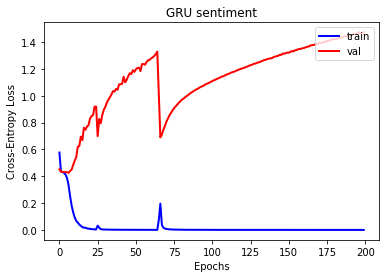

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

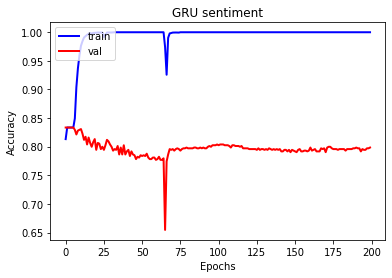

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
